In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Input Data
data = pd.read_csv("/content/data.csv")
genre_data = pd.read_csv('/content/data_by_genres.csv')
year_data = pd.read_csv('/content/data_by_year.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [4]:
print(genre_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None


In [5]:
print(year_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


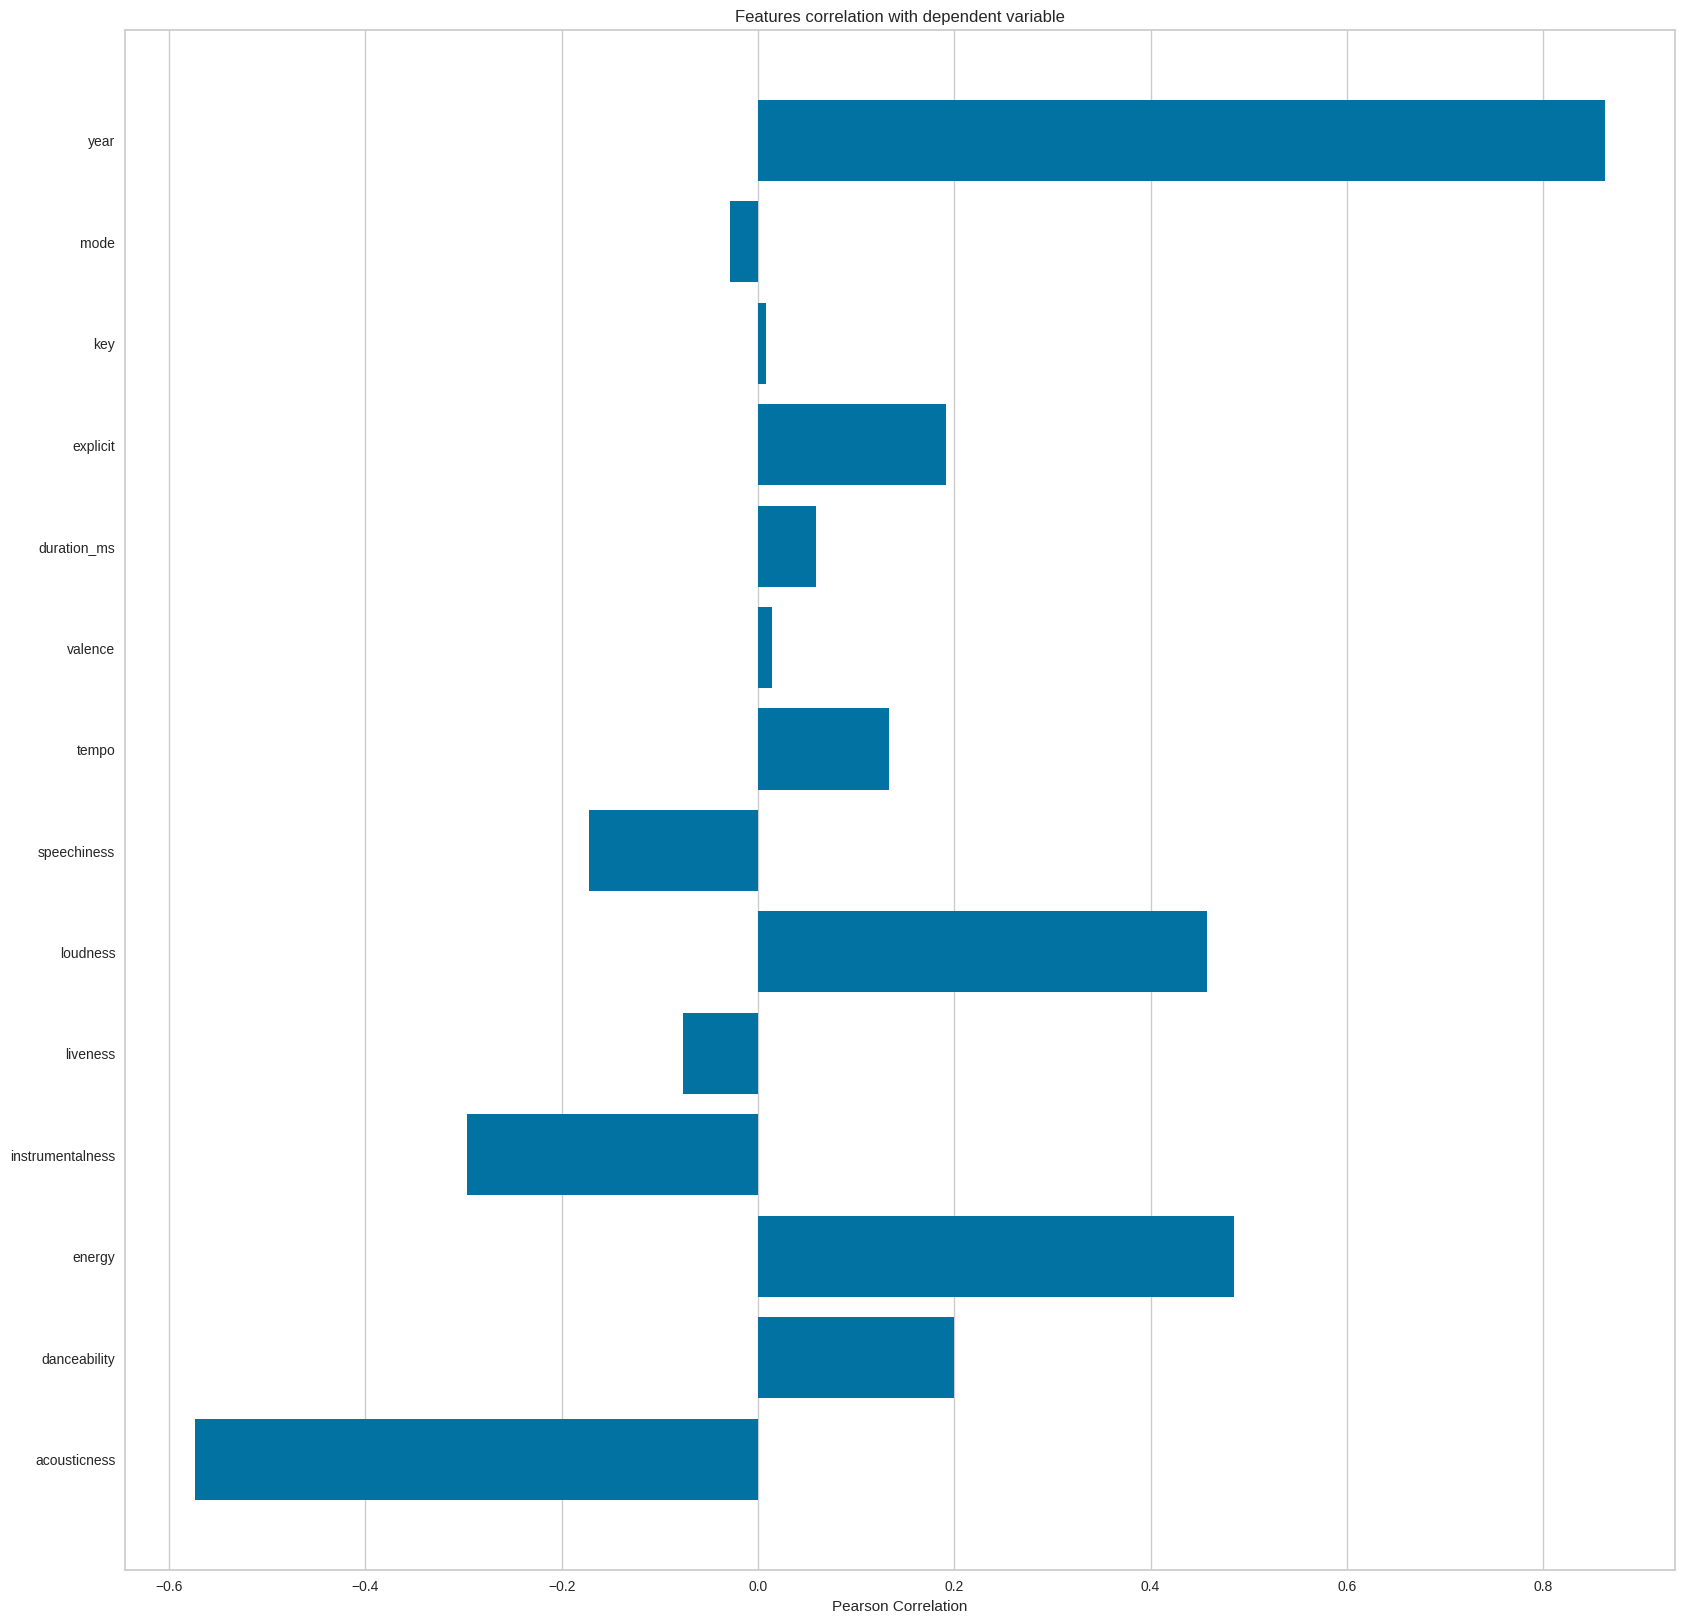

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [6]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

Korelasi yang palig tinggi ada pada tahun karna semakin baru tahun rilis lagu maka besar kemungkinan targetnya bisa meningkat. Untuk lagu yang yang keras, enerjik, enak buat joget punya korelasi yang positif ke target. dan untuk lagu yang terlalu akustik, instrumental cenderung kurang di sukai (minim popularitas).

<Axes: xlabel='count', ylabel='decade'>

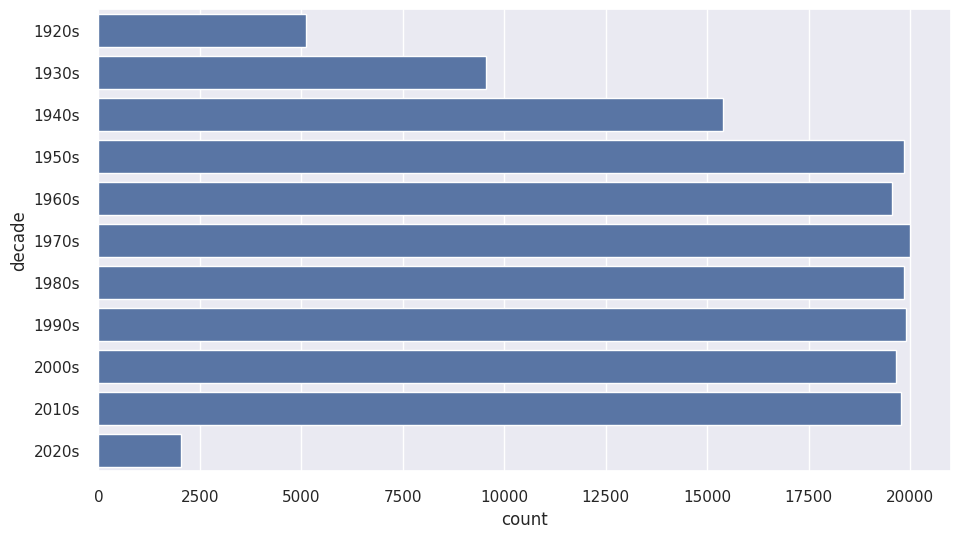

In [7]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data['decade'])

Grafik ini menunjukkan bahwa distribusi jumlah lagu berdasarkan dekade, lonjakan ini cukup signifikan dimulai dari tahun 1940-an hingga 2010-an yang masing-masing mencatat hampir 20.000 lagu. Ini mencerminkan pertumbuhan industri musik dan peningkatan teknologi rekaman. Sementara itu, pada dekade 1920-an dan 2020-an memiliki jumlah lagu yang jauh lebih sedikit pada tahun 1920-an karena keterbatasan rekaman di masa awal, dan 2020-an karena data yang masih berkembang. Secara keseluruhan, grafik ini menggambarkan dominasi lagu-lagu dari era modern dalam dataset yang digunakan.

In [8]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

Grafik ini nunjukin perubahan karakteristik lagu dari waktu ke waktu. Dulu, sekitar tahun 1920–1960-an, lagu-lagu cenderung lebih akustik dan banyak yang instrumental. Tapi makin ke sini, lagu jadi lebih energik, mudah buat joget (danceable), dan kurang akustik. Nilai *valence* (kesan ceria lagu) agak naik-turun, tapi secara umum stabil. Perubahan ini nyambung sama perkembangan teknologi, selera pasar, dan tren musik yang makin modern.

In [9]:
top10_genres = genre_data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

Grafik ini membandingkan empat karakteristik musik (valence, energy, danceability, dan acousticness) di berbagai genre musik. Setiap batang mewakili nilai dari karakteristik tersebut untuk genre tertentu. Misalnya, untuk genre "basshall", nilai "energy" terlihat paling tinggi dibandingkan karakteristik lainnya. Dengan melihat tinggi batang yang berbeda untuk setiap genre, kita bisa mendapatkan gambaran sekilas tentang bagaimana karakteristik-karakteristik ini bervariasi antar genre musik.

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [20]:
df = pd.read_csv('/content/data_by_genres.csv')


In [21]:
X = df.select_dtypes(include=['float64', 'int64'])  # hanya data numerik

cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=10, random_state=42))
])

cluster_pipeline.fit(X)

# Predict cluster untuk setiap genre
df['cluster'] = cluster_pipeline.predict(X)


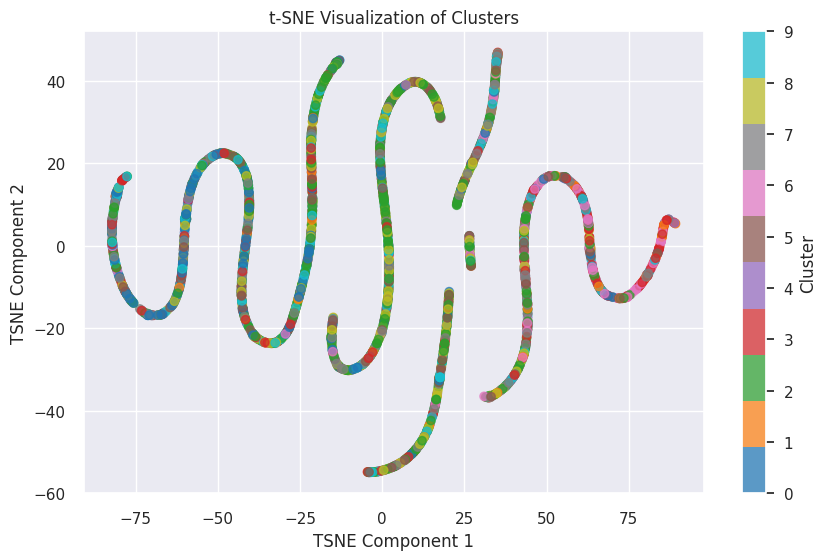

In [23]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X)

# Masukin hasil t-SNE ke dataframe
df['tsne-2d-one'] = tsne_results[:, 0]
df['tsne-2d-two'] = tsne_results[:, 1]

# Plot
plt.figure(figsize=(10,6))
scatter = plt.scatter(df['tsne-2d-one'], df['tsne-2d-two'],
                      c=df['cluster'], cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()


Grafik ini menunjukkan bagaimana sekelompok data dikelompokkan setelah dianalisis menggunakan teknik t-SNE. Bayangkan setiap titik adalah sebuah data, dan warna titik menunjukkan kelompok mana data tersebut berada. Teknik t-SNE ini membantu kita melihat pola pengelompokan data dalam bentuk dua dimensi, meskipun data aslinya mungkin punya banyak dimensi. Jadi, kita bisa melihat ada beberapa kelompok data yang terpisah dan membentuk pola tertentu di grafik ini.

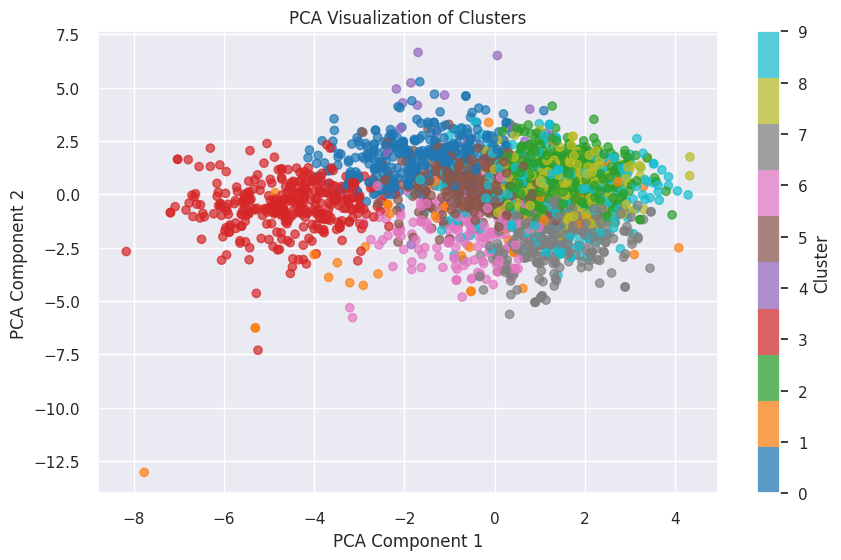

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ambil fitur numerik
X = df_genres.select_dtypes(include=['float64', 'int64'])

# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Jalankan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Simpan hasil PCA ke dataframe
df_genres['pca-one'] = pca_result[:, 0]
df_genres['pca-two'] = pca_result[:, 1]

# Plot hasil PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_genres['pca-one'], df_genres['pca-two'],
                      c=df_genres['cluster'], cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Clusters')
plt.grid(True)
plt.show()

 Setiap titik masih mewakili sebuah data, dan warnanya menunjukkan kelompoknya. PCA membantu menyederhanakan data yang kompleks menjadi dua dimensi agar kita bisa melihat bagaimana data-data ini berkelompok. Di sini, kita bisa melihat ada beberapa kelompok yang berbeda, meskipun batas antar kelompoknya tidak sejelas pada grafik sebelumnya.